In [12]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from sympy import *

10 27.242246859422277
20 27.020039600871034
50 25.536345954629443
100 21.219009785953812
500 9.797180883031723


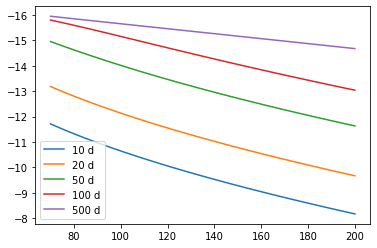

In [13]:
t = np.linspace(70, 200)

for t_0 in [10, 20, 50, 100, 500]:
    e_ni = 3.9e10
    e_co = 6.8e9
    t_ni = 8.8
    t_co = 111.3
    l_gamma = 0.1*u.solMass.to(u.g)*((e_ni-e_co)*np.exp(-t/t_ni) + e_co*np.exp(-t/t_co))
    l = l_gamma*(1-np.exp(-(t/t_0)**-2))
    m = 4.74-2.5*np.log10(l/3.83e33)
    slope = (m.min()-m.max())/(t.min()-t.max())
    print(t_0, slope*1e3)
    plt.plot(t, m, label='%d d' % t_0)
    
plt.legend()
plt.gca().invert_yaxis()

In [21]:
t = Symbol('t')
m_g = Symbol('Mg') + Symbol('slopeg')*(t - Symbol('tg'))
m_r = Symbol('Mr') + Symbol('sloper')*(t - Symbol('tr'))
x = m_g-m_r
bc = Symbol('c_0') + Symbol('c_1')*x+Symbol('c_2')*x**2
abs_g = m_g + bc + Symbol('D')
abs_g

D + Mg + c_0 + c_1*(Mg - Mr + slopeg*(t - tg) - sloper*(t - tr)) + c_2*(Mg - Mr + slopeg*(t - tg) - sloper*(t - tr))**2 + slopeg*(t - tg)

In [29]:
t = Symbol('t')
l_gamma = Symbol('M_ni')*((Symbol('eps_ni') - Symbol('eps_co')) * exp(-t/Symbol('t_ni')) + Symbol('eps_co')*exp(-t/Symbol('t_co')))
l = l_gamma * (1-exp(-(t/Symbol('T_0'))**-2))
log(l)

log(M_ni*(1 - exp(-T_0**2/t**2))*(eps_co*exp(-t/t_co) + (-eps_co + eps_ni)*exp(-t/t_ni)))

In [33]:
expand_log(expand_log(log(l), force=True), force=True)

log(M_ni) + log(1 - exp(-T_0**2/t**2)) + log(eps_co*exp(-t/t_co) + (-eps_co + eps_ni)*exp(-t/t_ni))

In [37]:
expand(Symbol('c_2')*x**2)

Mg**2*c_2 - 2*Mg*Mr*c_2 + 2*Mg*c_2*slopeg*t - 2*Mg*c_2*slopeg*tg - 2*Mg*c_2*sloper*t + 2*Mg*c_2*sloper*tr + Mr**2*c_2 - 2*Mr*c_2*slopeg*t + 2*Mr*c_2*slopeg*tg + 2*Mr*c_2*sloper*t - 2*Mr*c_2*sloper*tr + c_2*slopeg**2*t**2 - 2*c_2*slopeg**2*t*tg + c_2*slopeg**2*tg**2 - 2*c_2*slopeg*sloper*t**2 + 2*c_2*slopeg*sloper*t*tg + 2*c_2*slopeg*sloper*t*tr - 2*c_2*slopeg*sloper*tg*tr + c_2*sloper**2*t**2 - 2*c_2*sloper**2*t*tr + c_2*sloper**2*tr**2